Accuracy: 0.7467
Classification Report:
              precision    recall  f1-score   support

     Anxiety       0.83      0.82      0.82      1659
  Depression       0.66      0.64      0.65      1896
      Normal       0.77      0.88      0.82      1358
      Stress       0.81      0.65      0.72      1137
    Suicidal       0.71      0.75      0.73      1825

    accuracy                           0.75      7875
   macro avg       0.76      0.75      0.75      7875
weighted avg       0.75      0.75      0.75      7875

Confusion Matrix:
[[1361  106   95   61   36]
 [ 101 1214  104   58  419]
 [  31   54 1196   38   39]
 [ 126  145   67  741   58]
 [  24  322   91   20 1368]]


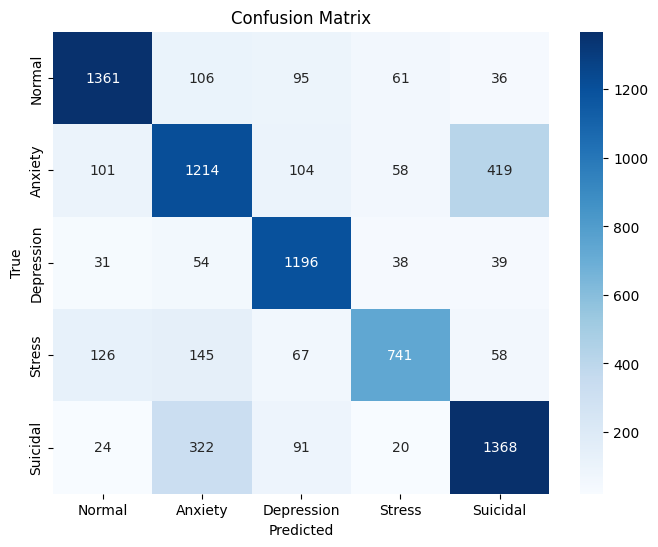

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("/content/drive/MyDrive/cleaned_mental_health_dataset.xlsx")  # Replace with your dataset loading method
df['label'] = df['label'].str.strip().str.capitalize()
# Split the dataset into train and test sets
X = df['statement']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()